In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
dataFrame = pd.read_csv("Datasets/maaslar.csv")
dataFrame

,unvan,Egitim Seviyesi,maas
0,Cayci,1,2250
1,Sekreter,2,2500
2,Uzman Yardimcisi,3,3000
3,Uzman,4,4000
4,Proje Yoneticisi,5,5500
5,Sef,6,7500
6,Mudur,7,10000
7,Direktor,8,15000
8,C-level,9,25000
9,CEO,10,50000


In [3]:
x = dataFrame.iloc[:,1]
y = dataFrame.iloc[:,-1]
X = x.values.reshape(-1,1)
Y = y.values.reshape(-1,1)

In [4]:
lr  = LinearRegression()
lr.fit(X,Y)

LinearRegression()

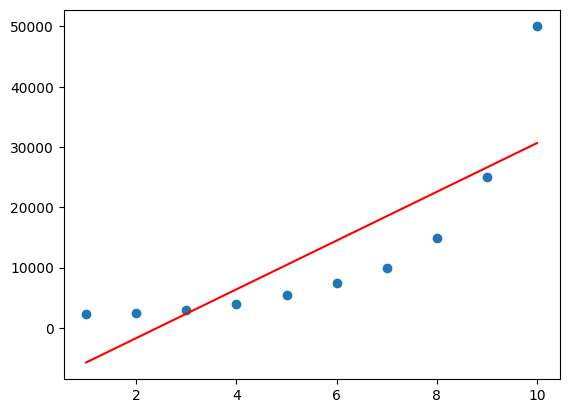

In [5]:
plt.scatter(X,Y)
plt.plot(X,lr.predict(X),"r")

In [6]:
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree= 20)
xPoly = pr.fit_transform(X)


In [7]:
lr2 = LinearRegression()
lr2.fit(xPoly,Y)

LinearRegression()

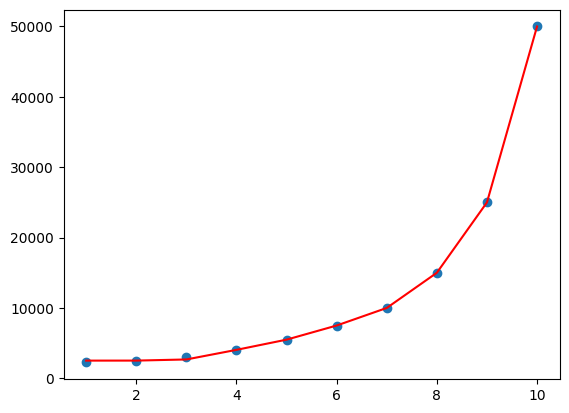

In [8]:
plt.scatter(X,Y)
plt.plot(X,lr2.predict(xPoly),"r")

In [9]:
print(lr2.predict(xPoly))

[[ 2515.04733126]
 [ 2517.54702774]
 [ 2678.75717473]
 [ 4044.06209732]
 [ 5493.84832658]
 [ 7500.82922378]
 [ 9999.90154206]
 [15000.00956726]
 [24999.99922897]
 [49999.99767713]]


In [10]:
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()
xOlcekli = sc1.fit_transform(X)
sc2 = StandardScaler()
yOlcekli = sc2.fit_transform(Y)

In [11]:
from sklearn.svm import SVR
sr = SVR(kernel="rbf",degree=4)
sr.fit(xOlcekli,yOlcekli)

C:\Users\Furkan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(degree=4)

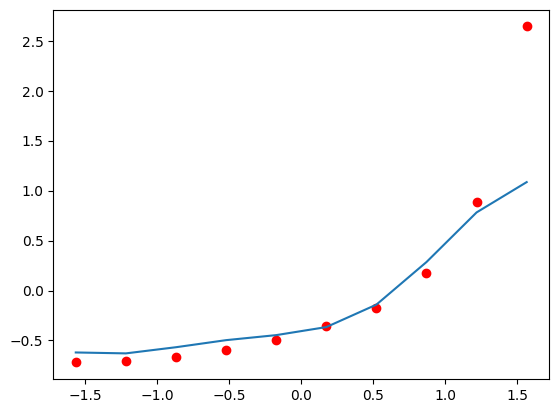

In [12]:
plt.scatter(xOlcekli,yOlcekli,color="red")
plt.plot(xOlcekli,sr.predict(xOlcekli))

In [14]:
from sklearn.metrics import r2_score
print("Support Vektor Regression R2 değerleri:")
r2_score(xOlcekli,sr.predict(xOlcekli))

Support Vektor Regression R2 değerleri:


0.7092048681422779

In [24]:
print("Polynomial Regression R2 değerleri:")
r2_score(Y,lr2.predict(xPoly))

Polynomial Regression R2 değerleri:


0.9999128539322009